In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import scipy.stats
from IPython.display import Video, display, HTML
sns.set()

def read_csvx(path, *args, **kwargs):
    try:
        return pd.read_csv(str(path) +'.gz', *args, **kwargs)
    except Exception as e:
        return pd.read_csv(str(path), *args, **kwargs)

def followorbit(vals, path):
    out = []
    for n in range(100):
        closest05 = np.clip(round(path[n] * 2) / 2, 0, 10)
        rank = vals.query(f'nbopp == {n} and othercoop == {closest05}')['rank'].values[0]
        out.append(rank)
    return np.array(out)

import re
def gethighest(vals):
        m = np.argmax([int(re.search('(\d+)', val).group(1)) for val in vals])
        return vals[m]

# Payoff heatmap

In [82]:
def sig(x, i, p):
    return 1 / (1 + np.exp(-p * (x - i)))

def payoff(x, x0, n):
    a = 5
    b = 8
    return (a*(x + (n-1)*x0)/n + (b*(n-1)*x0)/n - 1/2 * x**2) # * (1 - sig(n, 2.5, 1))

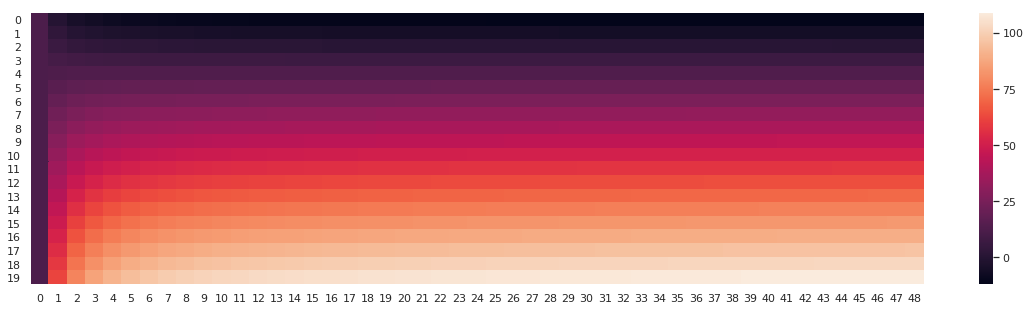

In [85]:
sns.set_palette('colorblind')
plt.figure(figsize=(20, 5))
x = np.arange(0, 10, 0.5)
n = np.arange(1, 50, 1)
nn, xx = np.meshgrid(n, x)
z = payoff(5, xx, nn)
sns.heatmap(z)

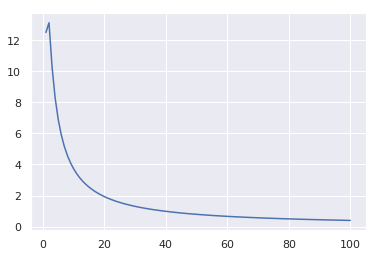

In [64]:
n = np.linspace(1, 100, 100)
plt.plot(n, payoff(5/n, 5/n, n))